In [116]:
import tensorflow as tf

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_train = pd.read_csv('train.csv')

In [119]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [120]:
df_train.dtypes

survived                int64
sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

In [121]:
df_train['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [122]:
df_train.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [123]:
df_train.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [124]:
df_train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [125]:
df_train.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [126]:
df_train.shape

(627, 10)

#EDA

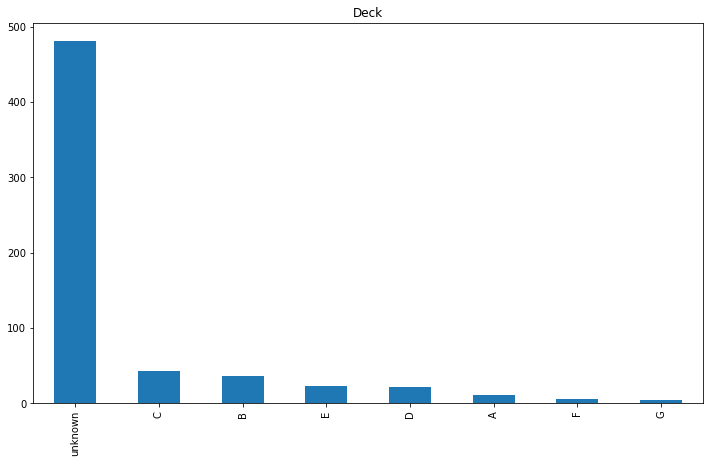

In [127]:
plt.figure(figsize=(12,7))
df_train['deck'].value_counts().plot.bar()
plt.title('Deck')
plt.show()

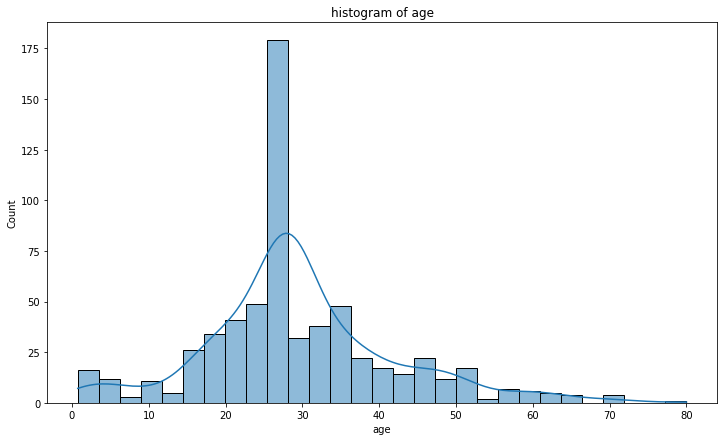

In [128]:
plt.figure(figsize=(12,7))
sns.histplot(df_train['age'],kde=True)
plt.title("histogram of age")
plt.show()

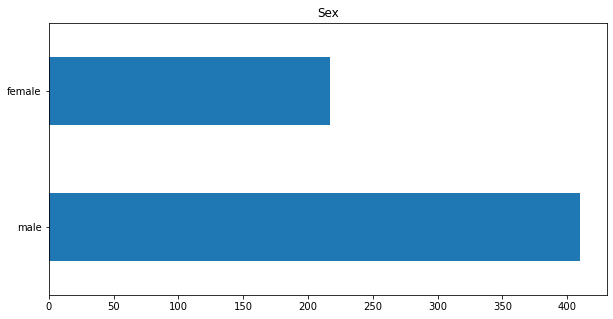

In [129]:
plt.figure(figsize=(10,5))
df_train['sex'].value_counts().plot.barh()
plt.title('Sex')
plt.show()

In [130]:
df_survived = df_train[df_train['survived']==1]

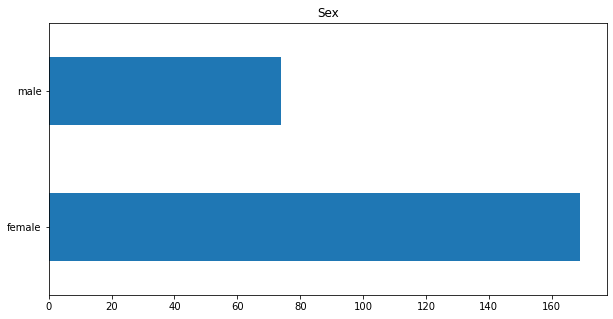

In [131]:
plt.figure(figsize=(10,5))
df_survived['sex'].value_counts().plot.barh()
plt.title('Sex')
plt.show()

In [132]:
val = list(df_train['sex'].unique())

In [133]:
for i in val:
    percen = df_survived[df_survived['sex']==i]['sex'].count()/df_train[df_train['sex']==i]['sex'].count()
    print(f'{i} percentage survived = {percen}')

male percentage survived = 0.18048780487804877
female percentage survived = 0.7788018433179723


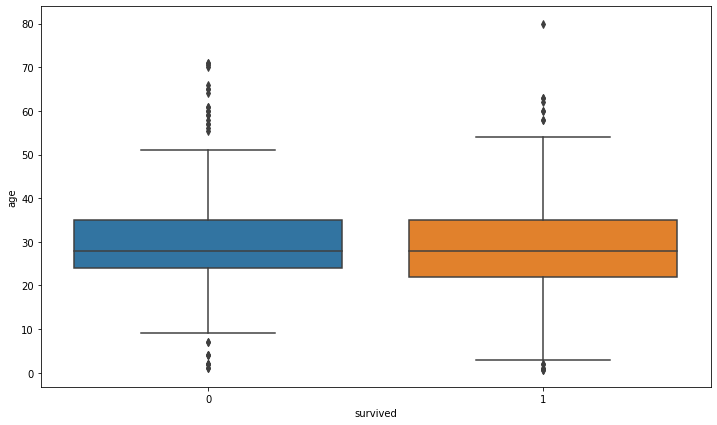

In [134]:
plt.figure(figsize=(12,7))
sns.boxplot(x='survived',y='age',data=df_train)
plt.show()

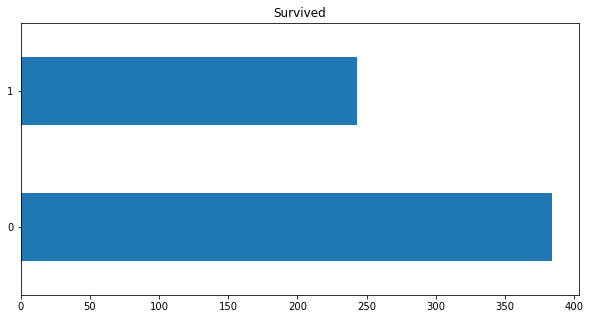

In [135]:
plt.figure(figsize=(10,5))
df_train['survived'].value_counts().plot.barh()
plt.title('Survived')
plt.show()

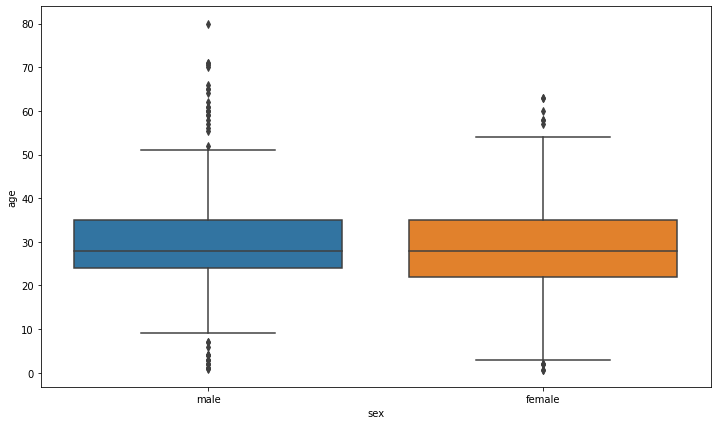

In [136]:
plt.figure(figsize=(12,7))
sns.boxplot(x='sex',y='age',data=df_train)
plt.show()

#Observations

- No. of males in the ship is very high as compared to females
- Percentage survival rate of female is 77.9% as compared to 18.0% for males
- Age distribution for male and female in the ship is comparatively similar
- People who died are higher than people who survived this tragedy
- Age distribution of people who survived and died are similar

#Training and Testing Data

In [137]:
df_test = pd.read_csv('eval.csv')

In [138]:
y_train = df_train.pop('survived')

In [139]:
y_test = df_test.pop('survived')

In [140]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [141]:
df_test.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [142]:
cols =df_train.columns

In [143]:
df_train.dtypes

sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

https://crunchingthedata.com/continuous-categorical-columns-pandas/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [144]:
num_cols = list(df_train.select_dtypes(include='number').columns)

In [145]:
num_cols

['age', 'n_siblings_spouses', 'parch', 'fare']

In [146]:
num_cols

['age', 'n_siblings_spouses', 'parch', 'fare']

In [147]:
cat_cols = list(df_train.select_dtypes(exclude='number').columns)

In [148]:
cat_cols

['sex', 'class', 'deck', 'embark_town', 'alone']

In [149]:
feature_columns = []

In [150]:
for feature_name in cat_cols:
    vocabulary = df_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

In [151]:
for feature_name in num_cols:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [152]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='parch', shape=(1,), defau

Training Process

In [153]:
def make_input_fn(data_df,label_df,num_epochs = 10, shuffle=True,batch_size =32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))#create tf.data.Dataset object
        if shuffle:
            ds =ds.shuffle(1000) #randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) #split dataset into batches of 32 and repeat process for no. of epochs
        return ds #return a batch of the dataset
    return input_function

In [154]:
train_input_fn = make_input_fn(df_train,y_train)
test_input_fn = make_input_fn(df_test,y_test,shuffle =False, num_epochs=1)

In [155]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='parch', shape=(1,)

Creating Linear model

In [156]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [157]:
linear_est.train(train_input_fn)

INFO:tensorflow:Calling model_fn.


/Users/mathews/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 209.547
INFO:tensorflow:loss = 0.46863136, step = 100 (0.478 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.44611606.


In [158]:
result = linear_est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-08T13:54:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.12098s
INFO:tensorflow:Finished evaluation at 2023-06-08-13:54:52
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7651515, accuracy_baseline = 0.625, auc = 0.80679524, auc_precision_recall = 0.75728405, average_loss = 0.5439883, global_step = 200, label/mean = 0.375, loss = 0.5330322, precision = 0.74666667, prediction/mean = 0.2832256, recall = 0.56565654
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5/model.ckpt-200


In [159]:
result.keys()

dict_keys(['accuracy', 'accuracy_baseline', 'auc', 'auc_precision_recall', 'average_loss', 'label/mean', 'loss', 'precision', 'prediction/mean', 'recall', 'global_step'])

In [160]:
result['accuracy']

0.7651515

In [167]:
result2 = list(linear_est.predict(test_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/lz/0jd9p3ss3417vd872nl5rdt40000gn/T/tmp_25vubu5/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [168]:
print(result2)

[{'logits': array([-2.566406], dtype=float32), 'logistic': array([0.07133201], dtype=float32), 'probabilities': array([0.928668  , 0.07133202], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.8362373], dtype=float32), 'logistic': array([0.13749692], dtype=float32), 'probabilities': array([0.86250305, 0.1374969 ], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.26786345], dtype=float32), 'logistic': array([0.5665683], dtype=float32), 'probabilities': array([0.43343168, 0.5665683 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.28851706], dtype=f

In [169]:
print(result2[0]['probabilities'])

[0.928668   0.07133202]
